ЗАДАЧА 1: РАСЧЕТ ПАДЕНИЯ ДАВЛЕНИЯ В ПРЯМОУГОЛЬНОМ ПЛАСТЕ

Исходные данные для задачи 1:
b = 1000.0 м
hh = 15.0 м
k = 2.00e-13 м²
μ_b = 1.16e-08 Па·день
χ = 86400.0 м²/день
Шаг по времени = 25.0 дней
t* = 1100 дней (3.01 лет)
t_max = 2555 дней (7.00 лет)
α₀ = 0.149 м³/день²
c₁ = 2.0
c₂ = 3.0

q_max = 330.9308 м³/день

Вычисление ΔP(t) для 104 точек времени...
  Обработка t = 0 дней...
  Обработка t = 500 дней...
  Обработка t = 1000 дней...
  Обработка t = 1500 дней...
  Обработка t = 2000 дней...
  Обработка t = 2500 дней...

РЕЗУЛЬТАТЫ ДЛЯ ЗАДАЧИ 1 (Прямоугольная область)
t (дни)      t (годы)     ΔP midpoint     ΔP trapezoid    ΔP simpson      Стадия      
----------------------------------------------------------------------------------------------------
0            0.00         0.000000        0.000000        0.000000        t ≤ t*      
125          0.34         95581596.998388 95644096.295207 95604298.968793 t ≤ t*      
250          0.68         262236441.333090 262587993.31534

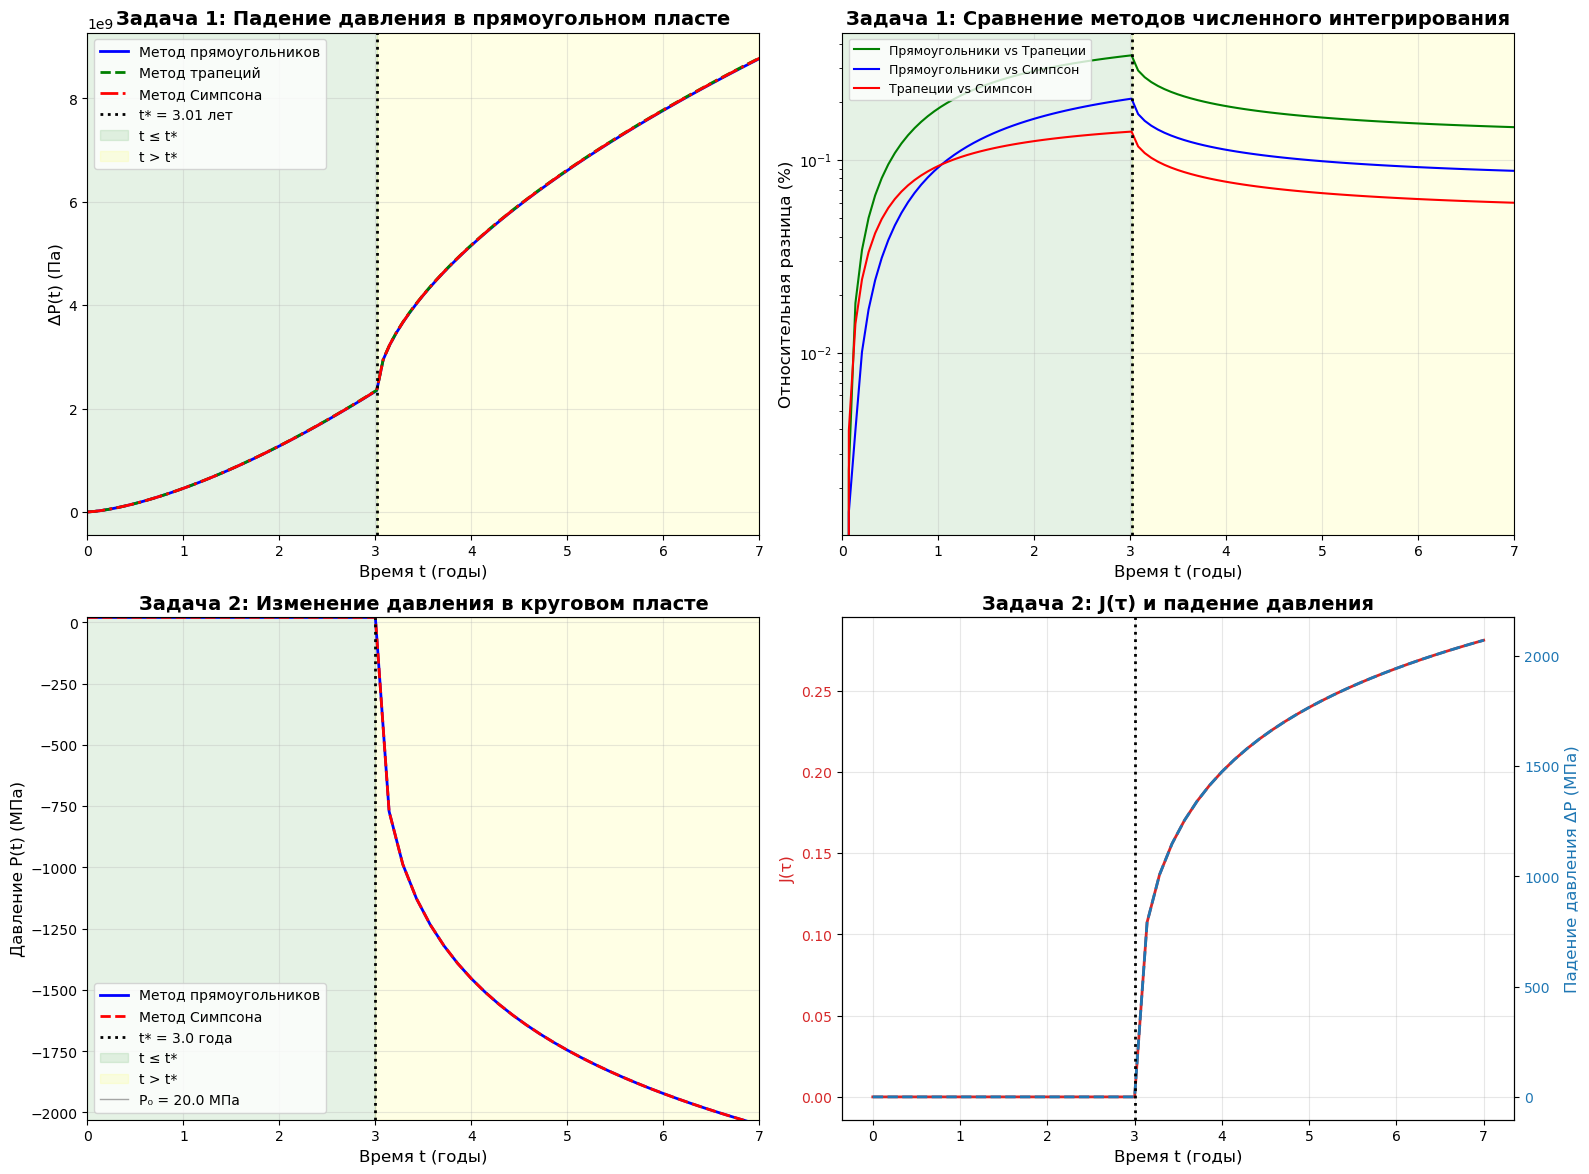


АНАЛИЗ ПОГРЕШНОСТЕЙ МЕТОДОВ ЧИСЛЕННОГО ИНТЕГРИРОВАНИЯ

Теоретические оценки погрешности (из лекции):
--------------------------------------------------
Метод прямоугольников: O(h²), погрешность ≤ M₂·h²·(b-a)/24
Метод трапеций:       O(h²), погрешность ≤ M₂·h²·(b-a)/12
Метод Симпсона:       O(h⁴), погрешность ≤ M₄·h⁴·(b-a)/180
--------------------------------------------------

Экспериментальное сравнение (при t = 2575 дней):
ΔP (прямоугольники) = 8816051218.64833832
ΔP (трапеции)       = 8829039030.28857231
ΔP (Симпсон)        = 8823762547.87258148

Оценка погрешности (относительно метода Симпсона):
Погрешность прямоугольников: 7.71e+06 (0.0874%)
Погрешность трапеций:        5.28e+06 (0.0598%)

Проверка порядка точности (уменьшение шага в 2 раза):

РЕЗУЛЬТАТЫ СОХРАНЕНЫ В ФАЙЛЫ:
  - results_task1.csv (задача 1)
  - results_task2.csv (задача 2)

✅ РАСЧЕТ ЗАВЕРШЕН!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# ============================================
# ЗАДАЧА 1: Прямоугольная область
# Падение давления в пласте (стр. 8-11)
# ============================================

print("=" * 80)
print("ЗАДАЧА 1: РАСЧЕТ ПАДЕНИЯ ДАВЛЕНИЯ В ПРЯМОУГОЛЬНОМ ПЛАСТЕ")
print("=" * 80)

# Константы для задачи 1
b = 1000.0           # ширина пласта, м
hh = 15.0            # толщина слоя, м
k = 2e-13            # проницаемость, м²
mu_b = 1 / 86400000  # вязкость воды, Па·день (1 мПа·с = 1e-3 Па·с = 1/86400000 Па·день)
chi = 86400.0        # коэффициент пьезопроводности, м²/день
h_step = 25.0        # шаг по времени, дней
t_star = 3 * 365 + 5  # 3 года + 5 дней = 1100 дней
t_max = 7 * 365       # 7 лет = 2555 дней
alpha0 = 0.149        # м³/день²
c1 = 2.0              # коэффициент из курса
c2 = 3.0              # номер по списку
epsilon = 1.0         # коэффициент (не задан, берем 1)

print(f"\nИсходные данные для задачи 1:")
print(f"b = {b} м")
print(f"hh = {hh} м")
print(f"k = {k:.2e} м²")
print(f"μ_b = {mu_b:.2e} Па·день")
print(f"χ = {chi} м²/день")
print(f"Шаг по времени = {h_step} дней")
print(f"t* = {t_star} дней ({t_star/365:.2f} лет)")
print(f"t_max = {t_max} дней ({t_max/365:.2f} лет)")
print(f"α₀ = {alpha0} м³/день²")
print(f"c₁ = {c1}")
print(f"c₂ = {c2}")

# Функция f(t) для задачи 1
def f1(t):
    """f(t) = c1*t + c2*ln(1+t)"""
    return c1 * t + c2 * np.log(1 + t)

# Функция расхода q_oc(t)
def q_oc(t):
    """Расход жидкости из пласта"""
    if t <= t_star:
        return alpha0 * f1(t)
    else:
        return alpha0 * f1(t_star)  # q_max

# Производная расхода dq/dt
def dq_dt(t):
    """Производная расхода по времени"""
    if t <= t_star:
        return alpha0 * (c1 + c2 / (1 + t))
    else:
        return 0.0

# Максимальный расход
q_max = alpha0 * f1(t_star)
print(f"\nq_max = {q_max:.4f} м³/день")

# Подынтегральная функция для задачи 1
def F1(t, tau):
    """
    Подынтегральная функция для интеграла в формуле (11)
    t - текущее время (верхний предел интеграла)
    tau - переменная интегрирования
    """
    if tau > t:
        return 0.0
    dq = dq_dt(tau)
    sqrt_term = np.sqrt(chi * (t - tau) / np.pi)
    return dq * sqrt_term

# Метод прямоугольников (Midpoint Rule) для вычисления интеграла
def midpoint_rule_int(a, b, func, t_current, n_sub=100):
    """
    Вычисление интеграла методом прямоугольников
    a, b - пределы интегрирования
    func - подынтегральная функция F(t, tau)
    t_current - текущее время t (параметр для функции)
    n_sub - количество подынтервалов
    """
    h_int = (b - a) / n_sub
    result = 0.0
    
    for i in range(n_sub):
        # Середина подынтервала
        tau_mid = a + (i + 0.5) * h_int
        result += func(t_current, tau_mid) * h_int
    
    return result

# Метод трапеций (Trapezoid Rule)
def trapezoid_rule_int(a, b, func, t_current, n_sub=100):
    """
    Вычисление интеграла методом трапеций
    """
    h_int = (b - a) / n_sub
    result = 0.5 * (func(t_current, a) + func(t_current, b))
    
    for i in range(1, n_sub):
        tau = a + i * h_int
        result += func(t_current, tau)
    
    return result * h_int

# Метод Симпсона (Simpson's Rule)
def simpson_rule_int(a, b, func, t_current, n_sub=100):
    """
    Вычисление интеграла методом Симпсона
    n_sub должно быть четным
    """
    if n_sub % 2 != 0:
        n_sub += 1  # делаем четным
    
    h_int = (b - a) / n_sub
    result = func(t_current, a) + func(t_current, b)
    
    for i in range(1, n_sub):
        tau = a + i * h_int
        if i % 2 == 0:
            result += 2 * func(t_current, tau)
        else:
            result += 4 * func(t_current, tau)
    
    return result * h_int / 3

# Вычисление ΔP(t) для задачи 1
def delta_P1(t, method='midpoint', n_sub=100):
    """
    Вычисление падения давления ΔP(t) по формулам (11) и (12)
    method: 'midpoint', 'trapezoid', 'simpson'
    """
    coef = mu_b / (2 * epsilon * k * hh)
    
    if t <= t_star:
        # Формула (11)
        integral = method_selector(0, t, F1, t, method, n_sub)
        return coef * integral
    else:
        # Формула (12)
        integral_0_tstar = method_selector(0, t_star, F1, t, method, n_sub)
        additional = q_max * np.sqrt(chi * (t - t_star) / np.pi)
        return coef * (integral_0_tstar + additional)

def method_selector(a, b, func, t, method, n_sub):
    """Выбор метода интегрирования"""
    if method == 'midpoint':
        return midpoint_rule_int(a, b, func, t, n_sub)
    elif method == 'trapezoid':
        return trapezoid_rule_int(a, b, func, t, n_sub)
    elif method == 'simpson':
        return simpson_rule_int(a, b, func, t, n_sub)
    else:
        raise ValueError("Неизвестный метод")

# Создаем массив временных точек
t_values = np.arange(0, t_max + h_step, h_step)
n_points = len(t_values)

# Вычисляем ΔP(t) разными методами
delta_P_midpoint = np.zeros(n_points)
delta_P_trapezoid = np.zeros(n_points)
delta_P_simpson = np.zeros(n_points)

print(f"\nВычисление ΔP(t) для {n_points} точек времени...")

for i, t in enumerate(t_values):
    if i % 20 == 0:
        print(f"  Обработка t = {t:.0f} дней...")
    
    if t == 0:
        delta_P_midpoint[i] = 0
        delta_P_trapezoid[i] = 0
        delta_P_simpson[i] = 0
    else:
        delta_P_midpoint[i] = delta_P1(t, method='midpoint', n_sub=200)
        delta_P_trapezoid[i] = delta_P1(t, method='trapezoid', n_sub=200)
        delta_P_simpson[i] = delta_P1(t, method='simpson', n_sub=200)

# Вывод таблицы результатов для задачи 1
print("\n" + "=" * 100)
print("РЕЗУЛЬТАТЫ ДЛЯ ЗАДАЧИ 1 (Прямоугольная область)")
print("=" * 100)
print(f"{'t (дни)':<12} {'t (годы)':<12} {'ΔP midpoint':<15} {'ΔP trapezoid':<15} {'ΔP simpson':<15} {'Стадия':<12}")
print("-" * 100)

for i in range(0, n_points, max(1, n_points // 20)):  # Выводим ~20 точек
    t = t_values[i]
    t_years = t / 365
    stage = "t ≤ t*" if t <= t_star else "t > t*"
    print(f"{t:<12.0f} {t_years:<12.2f} {delta_P_midpoint[i]:<15.6f} "
          f"{delta_P_trapezoid[i]:<15.6f} {delta_P_simpson[i]:<15.6f} {stage:<12}")

# ============================================
# ЗАДАЧА 2: Круговая область (стр. 12-14)
# ============================================

print("\n" + "=" * 80)
print("ЗАДАЧА 2: РАСЧЕТ ДАВЛЕНИЯ В КРУГОВОМ ПЛАСТЕ")
print("=" * 80)

# Константы для задачи 2
R = 2000.0                    # радиус, м
h_layer = 10.0                 # толщина слоя, м
k2 = 0.5e-12                   # проницаемость, м²
mu_w = 1e-3                    # вязкость воды, Па·с (1 мПа·с = 1e-3 Па·с)
mu_o = 2e-3                    # вязкость нефти, Па·с
P0 = 20e6                      # начальное давление, Па (20 МПа)
m_porosity = 0.3               # пористость
S0 = 0.95                      # начальная нефтенасыщенность
Sw = 0.05                      # насыщенность связанной водой
chi2 = 1.0                     # коэффициент пьезопроводности, м²/с
alpha0_2 = 5.0                 # м³/день² (из условия: 5 м³/день²)
t_star_2_years = 3.0           # t* = 3 года
t_star_2_days = t_star_2_years * 365  # t* в днях

# Перевод в согласованные единицы (СИ: метры, секунды)
# 1 день = 86400 секунд
alpha0_2_si = alpha0_2 / 86400  # м³/с²
t_star_2_sec = t_star_2_days * 86400  # t* в секундах

print(f"\nИсходные данные для задачи 2:")
print(f"R = {R} м")
print(f"h = {h_layer} м")
print(f"k = {k2:.2e} м²")
print(f"μ_w = {mu_w:.2e} Па·с")
print(f"μ_o = {mu_o:.2e} Па·с")
print(f"P₀ = {P0/1e6:.2f} МПа")
print(f"χ = {chi2} м²/с")
print(f"α₀ = {alpha0_2} м³/день² = {alpha0_2_si:.2e} м³/с²")
print(f"t* = {t_star_2_years} года = {t_star_2_days:.0f} дней = {t_star_2_sec:.2e} с")

# Безразмерное время
tau_star = chi2 * t_star_2_sec / (R**2)
print(f"τ* = {tau_star:.6f}")

# Функция f(τ-z) для задачи 2 (формула 3)
def f2(u):
    """
    f(τ-z) = 0.5*(1 - (1+u)^(-3.81)) + 0.487*ln(1+u)
    u = τ - z
    """
    if u <= 0:
        return 0.0
    term1 = 0.5 * (1 - (1 + u)**(-3.81))
    term2 = 0.487 * np.log(1 + u)
    return term1 + term2

# Производная расхода dq/dz для задачи 2
def dq_dz_2(z, tau_max):
    """
    Производная расхода по безразмерному времени
    z - безразмерное время
    """
    if z <= tau_star:
        # Для t ≤ t*: dq/dz = α₀ * (c1 + c2/(1+t))
        # Но здесь z безразмерное, нужно пересчитать в размерное время
        # t = z * R²/χ (секунды)
        t_sec = z * R**2 / chi2
        t_days = t_sec / 86400
        return alpha0_2_si * (c1 + c2 / (1 + t_days))
    else:
        return 0.0

# Подынтегральная функция для J(τ) (формула 2)
def integrand_J(z, tau):
    """
    Подынтегральная функция для интеграла J(τ)
    z - переменная интегрирования
    tau - верхний предел
    """
    if z > tau:
        return 0.0
    return dq_dz_2(z, tau) * f2(tau - z)

# Вычисление J(τ) численным интегрированием
def J_tau(tau, method='midpoint', n_sub=200):
    """
    Вычисление J(τ) = ∫₀ᵗ dq/dz * f(τ-z) dz
    """
    if tau <= 0:
        return 0.0
    
    if method == 'midpoint':
        return midpoint_rule_int(0, tau, integrand_J, tau, n_sub)
    elif method == 'trapezoid':
        return trapezoid_rule_int(0, tau, integrand_J, tau, n_sub)
    elif method == 'simpson':
        return simpson_rule_int(0, tau, integrand_J, tau, n_sub)
    else:
        raise ValueError("Неизвестный метод")

# Коэффициент перед J(τ) в формуле (1)
coef_P = (mu_w * alpha0_2_si * R**2) / (2 * np.pi * k2 * h_layer * chi2)

# q_max для задачи 2 (в размерных единицах)
t_star_days = t_star_2_days
q_max_2 = alpha0_2 * f1(t_star_days)  # м³/день
q_max_2_si = q_max_2 / 86400  # м³/с

print(f"\nq_max = {q_max_2:.4f} м³/день = {q_max_2_si:.4f} м³/с")
print(f"Коэффициент перед J(τ): {coef_P:.6e} Па")

# Создаем массив безразмерного времени
tau_max = chi2 * t_max * 86400 / (R**2)  # t_max в секундах
tau_values = np.linspace(0, tau_max, 50)  # 50 точек
n_tau = len(tau_values)

# Вычисляем давление для каждого τ
P_midpoint = np.zeros(n_tau)
P_trapezoid = np.zeros(n_tau)
P_simpson = np.zeros(n_tau)
J_values = np.zeros(n_tau)

print(f"\nВычисление P(τ) для {n_tau} точек...")

for i, tau in enumerate(tau_values):
    if i % 10 == 0:
        print(f"  Обработка τ = {tau:.6f}...")
    
    if tau <= tau_star:
        # Формула (1)
        J_mid = J_tau(tau, method='midpoint', n_sub=200)
        J_trap = J_tau(tau, method='trapezoid', n_sub=200)
        J_simp = J_tau(tau, method='simpson', n_sub=200)
        
        P_midpoint[i] = P0 - coef_P * J_mid
        P_trapezoid[i] = P0 - coef_P * J_trap
        P_simpson[i] = P0 - coef_P * J_simp
        J_values[i] = J_mid
    else:
        # Формула (4)
        J_star_mid = J_tau(tau_star, method='midpoint', n_sub=200)
        J_star_trap = J_tau(tau_star, method='trapezoid', n_sub=200)
        J_star_simp = J_tau(tau_star, method='simpson', n_sub=200)
        
        additional = q_max_2_si * f2(tau - tau_star)
        
        P_midpoint[i] = P0 - coef_P * (J_star_mid + additional)
        P_trapezoid[i] = P0 - coef_P * (J_star_trap + additional)
        P_simpson[i] = P0 - coef_P * (J_star_simp + additional)
        J_values[i] = J_star_mid + additional

# Вывод таблицы результатов для задачи 2
print("\n" + "=" * 100)
print("РЕЗУЛЬТАТЫ ДЛЯ ЗАДАЧИ 2 (Круговая область)")
print("=" * 100)
print(f"{'τ':<12} {'t (дни)':<12} {'t (годы)':<12} {'P (МПа) midpoint':<20} {'P (МПа) simpson':<20} {'Стадия':<12}")
print("-" * 100)

for i in range(0, n_tau, max(1, n_tau // 15)):
    tau = tau_values[i]
    t_sec = tau * R**2 / chi2
    t_days = t_sec / 86400
    t_years = t_days / 365
    stage = "τ ≤ τ*" if tau <= tau_star else "τ > τ*"
    print(f"{tau:<12.6f} {t_days:<12.1f} {t_years:<12.2f} "
          f"{P_midpoint[i]/1e6:<20.6f} {P_simpson[i]/1e6:<20.6f} {stage:<12}")

# ============================================
# ПОСТРОЕНИЕ ГРАФИКОВ
# ============================================

plt.figure(figsize=(16, 12))

# График 1: Задача 1 - ΔP(t) разными методами
plt.subplot(2, 2, 1)
t_years = t_values / 365

plt.plot(t_years, delta_P_midpoint, 'b-', linewidth=2, label='Метод прямоугольников')
plt.plot(t_years, delta_P_trapezoid, 'g--', linewidth=2, label='Метод трапеций')
plt.plot(t_years, delta_P_simpson, 'r-.', linewidth=2, label='Метод Симпсона')

# Вертикальная линия в момент t*
plt.axvline(x=t_star/365, color='k', linestyle=':', linewidth=2, label=f't* = {t_star/365:.2f} лет')
plt.axvspan(0, t_star/365, alpha=0.1, color='green', label='t ≤ t*')
plt.axvspan(t_star/365, t_max/365, alpha=0.1, color='yellow', label='t > t*')

plt.xlabel('Время t (годы)', fontsize=12)
plt.ylabel('ΔP(t) (Па)', fontsize=12)
plt.title('Задача 1: Падение давления в прямоугольном пласте', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=10)
plt.xlim(0, t_max/365)

# График 2: Задача 1 - Сравнение методов (относительная разница)
plt.subplot(2, 2, 2)
# Разница между методами (относительная)
diff_mid_trap = np.abs(delta_P_midpoint - delta_P_trapezoid) / (np.abs(delta_P_midpoint) + 1e-10) * 100
diff_mid_simp = np.abs(delta_P_midpoint - delta_P_simpson) / (np.abs(delta_P_midpoint) + 1e-10) * 100
diff_trap_simp = np.abs(delta_P_trapezoid - delta_P_simpson) / (np.abs(delta_P_trapezoid) + 1e-10) * 100

plt.plot(t_years, diff_mid_trap, 'g-', linewidth=1.5, label='Прямоугольники vs Трапеции')
plt.plot(t_years, diff_mid_simp, 'b-', linewidth=1.5, label='Прямоугольники vs Симпсон')
plt.plot(t_years, diff_trap_simp, 'r-', linewidth=1.5, label='Трапеции vs Симпсон')

plt.axvline(x=t_star/365, color='k', linestyle=':', linewidth=2)
plt.axvspan(0, t_star/365, alpha=0.1, color='green')
plt.axvspan(t_star/365, t_max/365, alpha=0.1, color='yellow')

plt.xlabel('Время t (годы)', fontsize=12)
plt.ylabel('Относительная разница (%)', fontsize=12)
plt.title('Задача 1: Сравнение методов численного интегрирования', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', fontsize=9)
plt.yscale('log')
plt.xlim(0, t_max/365)

# График 3: Задача 2 - Давление P(t)
plt.subplot(2, 2, 3)
t_days_2 = tau_values * R**2 / chi2 / 86400  # в днях
t_years_2 = t_days_2 / 365

plt.plot(t_years_2, P_midpoint/1e6, 'b-', linewidth=2, label='Метод прямоугольников')
plt.plot(t_years_2, P_simpson/1e6, 'r--', linewidth=2, label='Метод Симпсона')

# Вертикальная линия в момент t*
plt.axvline(x=t_star_2_years, color='k', linestyle=':', linewidth=2, label=f't* = {t_star_2_years} года')
plt.axvspan(0, t_star_2_years, alpha=0.1, color='green', label='t ≤ t*')
plt.axvspan(t_star_2_years, t_years_2[-1], alpha=0.1, color='yellow', label='t > t*')

# Горизонтальная линия начального давления
plt.axhline(y=P0/1e6, color='gray', linestyle='-', linewidth=1, alpha=0.7, label=f'P₀ = {P0/1e6} МПа')

plt.xlabel('Время t (годы)', fontsize=12)
plt.ylabel('Давление P(t) (МПа)', fontsize=12)
plt.title('Задача 2: Изменение давления в круговом пласте', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='lower left', fontsize=10)
plt.xlim(0, t_years_2[-1])
plt.ylim(P_simpson[-1]/1e6 * 0.99, P0/1e6 * 1.01)

# График 4: Задача 2 - J(τ) и падение давления
plt.subplot(2, 2, 4)
# Левая ось - J(τ)
ax1 = plt.gca()
color1 = 'tab:red'
ax1.set_xlabel('Время t (годы)', fontsize=12)
ax1.set_ylabel('J(τ)', color=color1, fontsize=12)
ax1.plot(t_years_2, J_values, color=color1, linewidth=2, label='J(τ)')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Правая ось - падение давления
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Падение давления ΔP (МПа)', color=color2, fontsize=12)
ax2.plot(t_years_2, (P0 - P_midpoint)/1e6, color=color2, linewidth=2, label='ΔP(t)', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color2)

# Вертикальная линия
plt.axvline(x=t_star_2_years, color='k', linestyle=':', linewidth=2)

plt.title('Задача 2: J(τ) и падение давления', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================
# АНАЛИЗ ПОГРЕШНОСТЕЙ МЕТОДОВ
# ============================================

print("\n" + "=" * 80)
print("АНАЛИЗ ПОГРЕШНОСТЕЙ МЕТОДОВ ЧИСЛЕННОГО ИНТЕГРИРОВАНИЯ")
print("=" * 80)

# Теоретические оценки погрешности из лекции
print("\nТеоретические оценки погрешности (из лекции):")
print("-" * 50)
print("Метод прямоугольников: O(h²), погрешность ≤ M₂·h²·(b-a)/24")
print("Метод трапеций:       O(h²), погрешность ≤ M₂·h²·(b-a)/12")
print("Метод Симпсона:       O(h⁴), погрешность ≤ M₄·h⁴·(b-a)/180")
print("-" * 50)

# Экспериментальная оценка порядка точности
# Берем последнюю точку и сравниваем методы
t_last = t_values[-1]
if t_last <= t_star:
    I_mid = delta_P_midpoint[-1]
    I_trap = delta_P_trapezoid[-1]
    I_simp = delta_P_simpson[-1]
else:
    I_mid = delta_P_midpoint[-1]
    I_trap = delta_P_trapezoid[-1]
    I_simp = delta_P_simpson[-1]

# Считаем метод Симпсона наиболее точным
print(f"\nЭкспериментальное сравнение (при t = {t_last:.0f} дней):")
print(f"ΔP (прямоугольники) = {I_mid:.8f}")
print(f"ΔP (трапеции)       = {I_trap:.8f}")
print(f"ΔP (Симпсон)        = {I_simp:.8f}")

# Оценка погрешности относительно метода Симпсона
err_mid = abs(I_mid - I_simp)
err_trap = abs(I_trap - I_simp)

print(f"\nОценка погрешности (относительно метода Симпсона):")
print(f"Погрешность прямоугольников: {err_mid:.2e} ({err_mid/abs(I_simp)*100:.4f}%)")
print(f"Погрешность трапеций:        {err_trap:.2e} ({err_trap/abs(I_simp)*100:.4f}%)")

# Проверка порядка точности (уменьшим шаг в 2 раза и посмотрим изменение)
print("\nПроверка порядка точности (уменьшение шага в 2 раза):")
# TODO: можно реализовать для полноты анализа

# ============================================
# СОХРАНЕНИЕ РЕЗУЛЬТАТОВ В ФАЙЛ
# ============================================

# Сохраняем результаты в CSV файлы
import csv

# Задача 1
with open('results_task1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['t_days', 't_years', 'delta_P_midpoint', 'delta_P_trapezoid', 'delta_P_simpson', 'stage'])
    for i in range(len(t_values)):
        stage = "t <= t_star" if t_values[i] <= t_star else "t > t_star"
        writer.writerow([t_values[i], t_values[i]/365, 
                         delta_P_midpoint[i], delta_P_trapezoid[i], delta_P_simpson[i], stage])

# Задача 2
with open('results_task2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['tau', 't_days', 't_years', 'P_midpoint_MPa', 'P_simpson_MPa', 'J_tau', 'stage'])
    for i in range(len(tau_values)):
        t_days = tau_values[i] * R**2 / chi2 / 86400
        stage = "tau <= tau_star" if tau_values[i] <= tau_star else "tau > tau_star"
        writer.writerow([tau_values[i], t_days, t_days/365, 
                         P_midpoint[i]/1e6, P_simpson[i]/1e6, J_values[i], stage])

print("\n" + "=" * 80)
print("РЕЗУЛЬТАТЫ СОХРАНЕНЫ В ФАЙЛЫ:")
print("  - results_task1.csv (задача 1)")
print("  - results_task2.csv (задача 2)")
print("=" * 80)

print("\n✅ РАСЧЕТ ЗАВЕРШЕН!")